
- see factor plot or pairplot and use it for initial exploration of relations between variables
- The week after work on cases from datacamp
- Maybe this week also work on the altair case with cars
- Then make exam on monday, use wednesday to point out issues

# MIS 492 - Data Analysis and Visualization
## Week 7

## Multivariate Visualization

### Dr. Mohammad AlMarzouq

# Relations Between Variables

In [1]:
# Setup the libraries
%matplotlib inline 
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)


# lets load the data again
weather_df = pd.read_csv("https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv")
cars_df = pd.read_json("https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json")

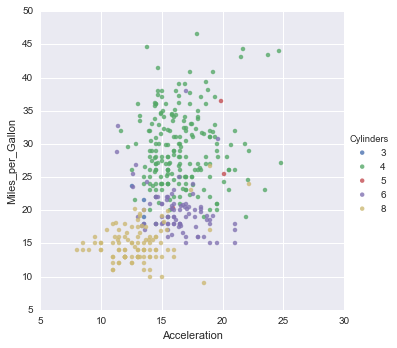

In [2]:
sns.lmplot(x='Acceleration', y='Miles_per_Gallon', hue='Cylinders',data=cars_df, fit_reg=False)

In [3]:
# 2 categoricals (count comparisons between groups)
# continuous and categorical (statistical/distributional comparisons between groups)
# 2 continuous (linear relations, groups can be created from continuous vars as well)
# more than three, most likely comparison of relation within groups
    # either on same plot 
    # multiple plots 
    # Depends on what you are trying to compare
    # Remember to keep the plot readable!
# start then with the altair cars case